In [45]:
# Load libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [46]:
## Setup
plt.style.use("ggplot")
filterwarnings("ignore")

In [47]:
# Load dataset
df_customer = pd.read_csv("../dataset/customer_interactions_synt.csv")
df_product  = pd.read_csv("../dataset/product_details_synt.csv")
df_purchase = pd.read_csv("../dataset/purchase_history_synt.csv")

In [48]:
def preview_metadata(df: pd.DataFrame) -> None:
    """
    Function to generate common information about dataframe
    
    Usage:
    >>> preview_metadata(df=df_customer)
    """
    print(df.info())
    print(df.describe())
    print(df.isna().sum())

In [49]:
## Customer dataset
preview_metadata(df_customer)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  1000 non-null   int64
 1   page_views   1000 non-null   int64
 2   time_spent   1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None
       customer_id   page_views   time_spent
count   1000.00000  1000.000000  1000.000000
mean       3.01800    22.427000   110.788000
std        1.25509     4.503216    21.401988
min        1.00000    15.000000    80.000000
25%        2.00000    19.000000    93.000000
50%        3.00000    22.000000   109.000000
75%        4.00000    26.000000   128.000000
max        5.00000    30.000000   150.000000
customer_id    0
page_views     0
time_spent     0
dtype: int64


In [50]:
## Product dataset
preview_metadata(df_product)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  1000 non-null   int64  
 1   category    1000 non-null   object 
 2   price       1000 non-null   int64  
 3   ratings     1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
        product_id        price      ratings
count  1000.000000  1000.000000  1000.000000
mean    102.975000   352.574000     4.286196
std       1.265692   240.158561     0.304178
min     101.000000    30.000000     3.800000
25%     102.000000   142.750000     4.043348
50%     103.000000   340.000000     4.278337
75%     104.000000   537.000000     4.527452
max     105.000000   800.000000     4.800000
product_id    0
category      0
price         0
ratings       0
dtype: int64


In [51]:
## Purchase dataset
preview_metadata(df_purchase)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   product_id     1000 non-null   int64 
 2   purchase_date  1000 non-null   object
dtypes: int64(2), object(1)
memory usage: 23.6+ KB
None
       customer_id   product_id
count  1000.000000  1000.000000
mean      2.729000   102.730000
std       1.291211     1.280914
min       1.000000   101.000000
25%       2.000000   102.000000
50%       3.000000   103.000000
75%       4.000000   104.000000
max       5.000000   105.000000
customer_id      0
product_id       0
purchase_date    0
dtype: int64


Dikarenakan dataset original tidak memiliki missing value, disertai proses sintetik dataset juga mengacu pada sampling data aktual, sehingga missing value tidak terindikasi di dalam dataset.

In [52]:
df_customer.head()

,customer_id,page_views,time_spent
0,3,17,80
1,4,23,118
2,2,22,110
3,3,23,124
4,4,18,93


In [53]:
df_product.head()

,product_id,category,price,ratings
0,104,Beauty,30,3.994960
1,104,Beauty,55,3.978298
2,104,Electronics,504,4.552655
3,102,Home & Kitchen,56,3.903787
4,102,Home & Kitchen,127,4.038468


In [54]:
df_purchase.head()

,customer_id,product_id,purchase_date
0,5,103,2023-01-04
1,1,103,2023-01-03
2,3,102,2023-01-03
3,1,102,2023-01-03
4,3,103,2023-01-04


Berdasarkan preview 3 tabel dataset diatas, bahwa dataset telah di normalisasi ke dalam 3NF, apabila hendak melakukan penggabungan beberapa tabel, maka bisa mengutamakan df_purchase tabel sebagai tabel utama dalam penggabungan dataset.

### 1. Data Exploration

Explore the provided dataset to understand the characteristics of customer interactions and purchase history.

#### 1.1. Univariate Analysis

1. Berapa minimal, rata-rata, dan maksimal jumlah tayangan halaman (page views) yang dilakukan oleh pengguna?

In [55]:
df_customer.groupby("customer_id").agg({"page_views": ["min", "mean", "max"]})

page_views               
                   min       mean max
customer_id                          
1                   16  24.895105  30
2                   15  22.960591  30
3                   15  22.515358  30
4                   15  21.604651  30
5                   15  20.301370  30

2. Bagaimana distribusi harga produk pada kategori 'Electronics'?

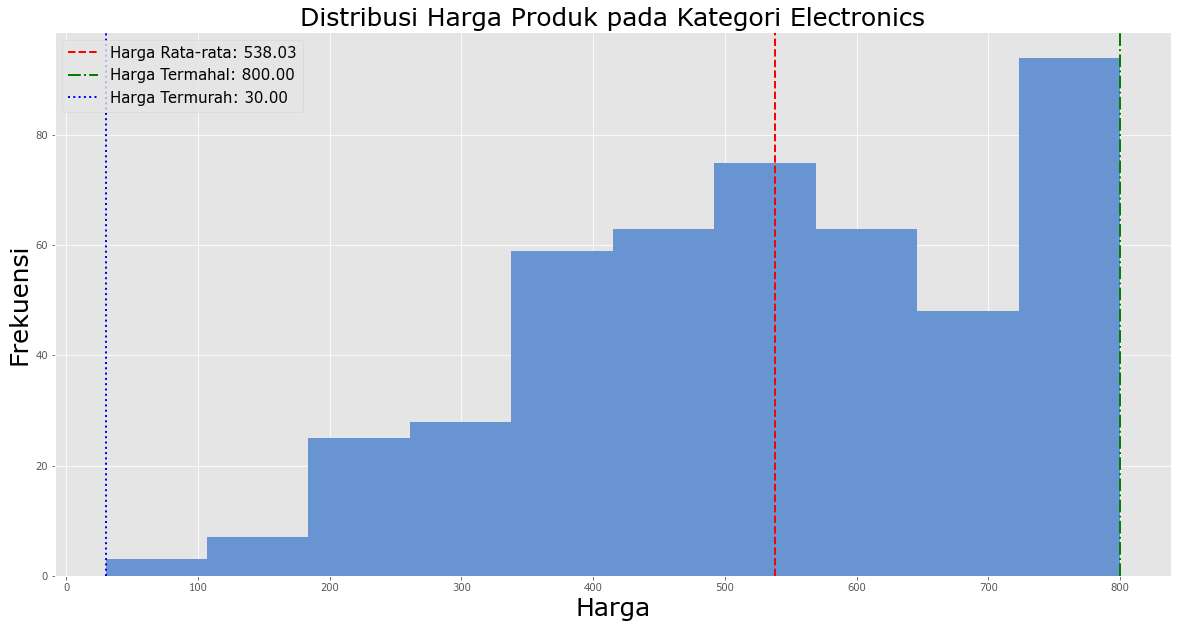

In [56]:
electronics_price = df_product[df_product['category'] == "Electronics"]["price"]
mean_price = electronics_price.mean()
max_price = electronics_price.max()
min_price = electronics_price.min()
ax = electronics_price.hist(color="#6895D2", figsize=(20, 10))
ax.set_title("Distribusi Harga Produk pada Kategori Electronics", fontsize=25)
ax.set_xlabel("Harga", fontsize=25)
ax.set_ylabel("Frekuensi", fontsize=25)
ax.axvline(mean_price, color='r', linestyle='--', linewidth=2, label=f"Harga Rata-rata: {mean_price:.2f}")
ax.axvline(max_price, color='g', linestyle='-.', linewidth=2, label=f"Harga Termahal: {max_price:.2f}")
ax.axvline(min_price, color='b', linestyle=':', linewidth=2, label=f"Harga Termurah: {min_price:.2f}")
ax.legend(fontsize=15, loc="upper left")
plt.show()

#### 1.2. Multivariate Analysis

In [57]:
# Join table
merged_data = pd.merge(df_product, df_purchase, on='product_id', how='inner')
merged_data = pd.merge(merged_data, df_customer, on='customer_id', how='inner')

In [65]:
# Drop duplicate dataset
merged_data = merged_data.drop_duplicates().reset_index(drop=True)

In [66]:
# Check dimension
merged_data.shape

(1945929, 8)

In [94]:
# Normalize ratings from float into int.
merged_data['ratings_normalize'] = merged_data.ratings.astype(int)

# Transform purchase_date into total_purcase.
merged_data['total_purchase'] = 1

In [95]:
# Overview merge dataset
merged_data.head()

,product_id,category,price,ratings,customer_id,purchase_date,page_views,time_spent,ratings_normalize,total_purchase
0,104,Beauty,30,3.99496,4,2023-01-05,23,118,3,1
1,104,Beauty,30,3.99496,4,2023-01-05,18,93,3,1
2,104,Beauty,30,3.99496,4,2023-01-05,24,119,3,1
3,104,Beauty,30,3.99496,4,2023-01-05,21,107,3,1
4,104,Beauty,30,3.99496,4,2023-01-05,15,80,3,1


3. Bagaimana distribusi waktu yang dihabiskan oleh pengguna berbeda-beda di setiap kategori produk?

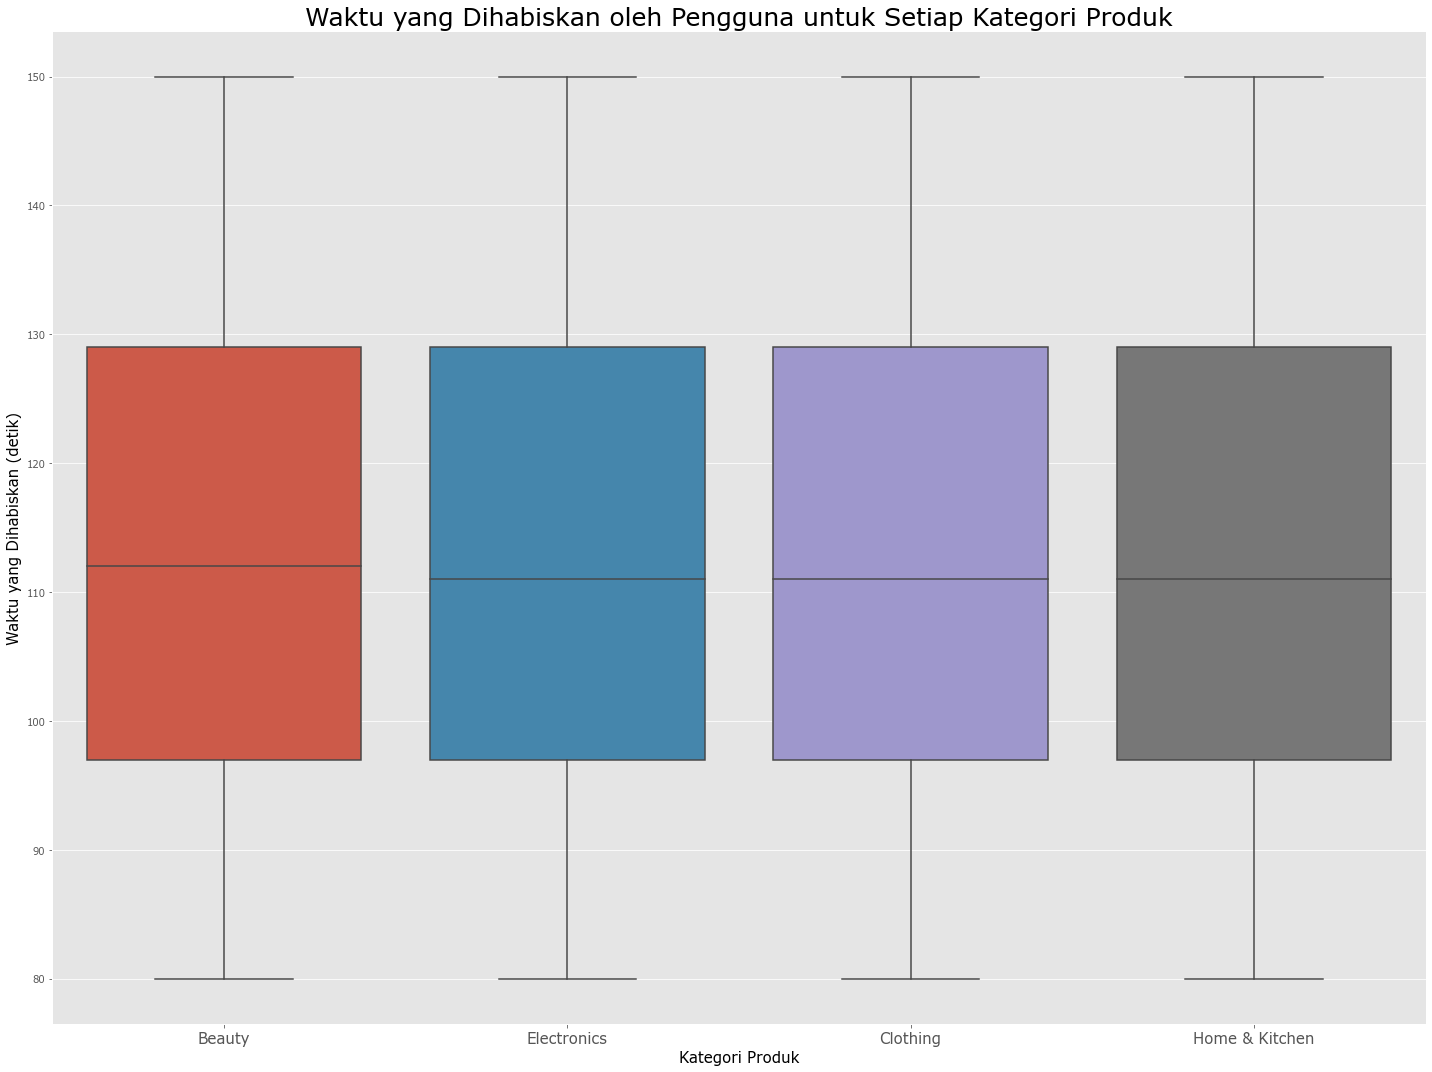

In [93]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=merged_data, x='category', y='time_spent')
plt.title('Waktu yang Dihabiskan oleh Pengguna untuk Setiap Kategori Produk', fontsize=25)
plt.xlabel('Kategori Produk', fontsize=15)
plt.ylabel('Waktu yang Dihabiskan (detik)', fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

> Pada semua jenis kategori produk memiliki interval waktu yang dihabiskan yang serupa, sehingga idealnya tim marketing bisa mencoba untuk memvariasikan tampilan halaman pada setiap jenis kategori sehingga bisa dianalisa lebih lanjut dari masing-masing preferensi user.

4. Berapa total halaman dilihat yang dibutuhkan customer dalam melihat suatu produk serta berapa jumlah pembelian yang dilakukan?

In [108]:
merged_data.head()

,product_id,category,price,ratings,customer_id,purchase_date,page_views,time_spent,ratings_normalize,total_purchase
0,104,Beauty,30,3.99496,4,2023-01-05,23,118,3,1
1,104,Beauty,30,3.99496,4,2023-01-05,18,93,3,1
2,104,Beauty,30,3.99496,4,2023-01-05,24,119,3,1
3,104,Beauty,30,3.99496,4,2023-01-05,21,107,3,1
4,104,Beauty,30,3.99496,4,2023-01-05,15,80,3,1


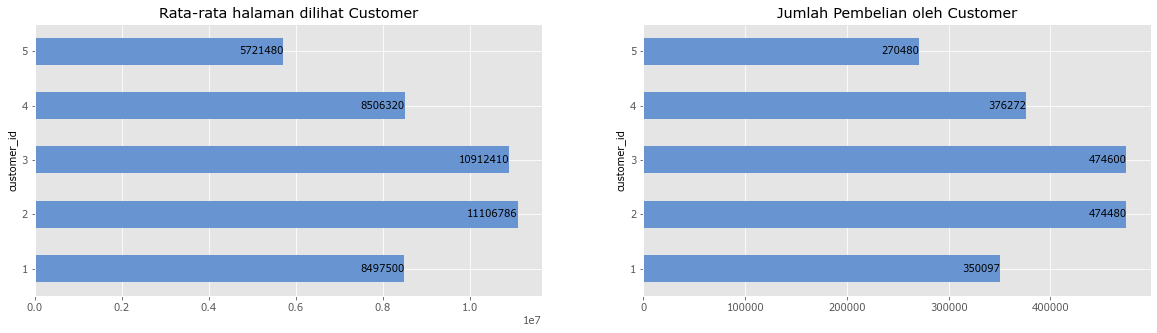

In [114]:
scope_data = merged_data.groupby("customer_id").agg({"page_views": ["sum"], "total_purchase": ["count"]}).reset_index()
scope_data.columns = ['customer_id', 'page_views', 'total_purchase']

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
scope_data.plot(kind="barh", y="page_views", x="customer_id", ax=ax[0], color="#6895D2", legend=False)
ax[0].set_title("Rata-rata halaman dilihat Customer")
for i, v in enumerate(scope_data['page_views']):
    ax[0].text(v, i, str(round(v,2)), va='center', ha="right")
    
scope_data.plot(kind="barh", y="total_purchase", x="customer_id", ax=ax[1], color="#6895D2", legend=False)
ax[1].set_title("Jumlah Pembelian oleh Customer")
for i, v in enumerate(scope_data['total_purchase']):
    ax[1].text(v, i, str(round(v,2)), va='center', ha="right")
    
plt.show()

> Customer rata-rata melihat suatu halaman sekitar 20x untuk melakukan pembelian, dengan tiap customer memiliki pola-pola tersendiri sehingga secara pola terbentuk garis yang linear antara banyaknya halaman yang dilihat dengan jumlah pembelian oleh pengguna.

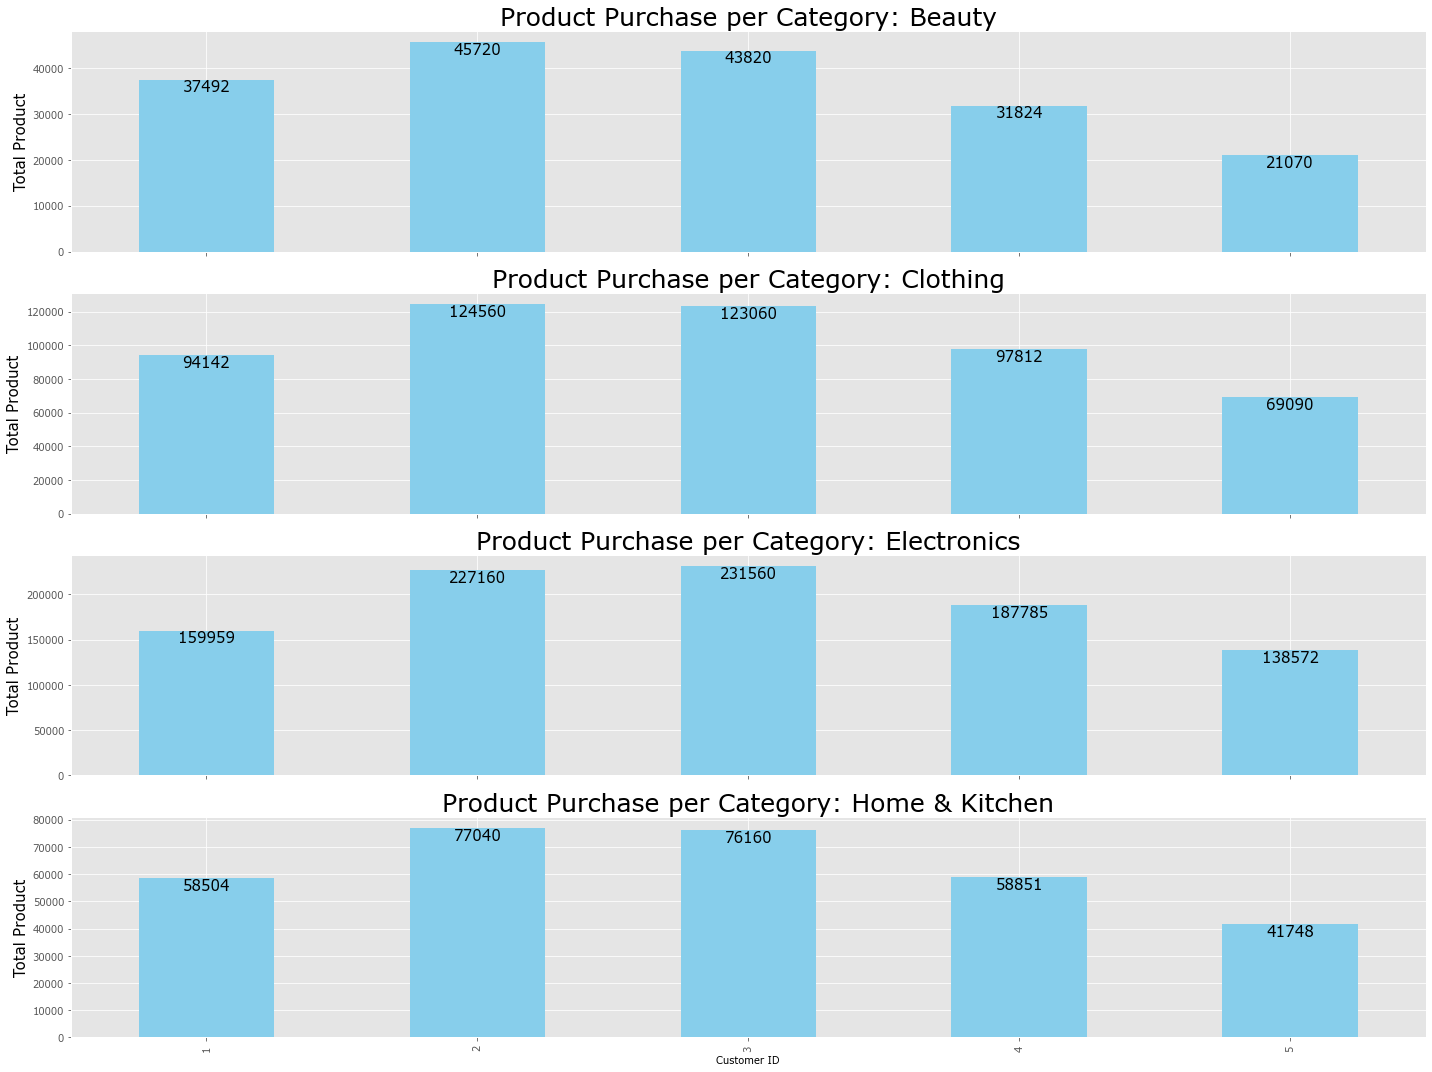

In [167]:
# Overview customer_id product category behaviours
scope_data = merged_data.groupby(['customer_id', 'category']).size().unstack(fill_value=0)
scope_data

fig, axes = plt.subplots(nrows=len(scope_data.columns), ncols=1, figsize=(20, 15), sharex=True)
for ax, category in zip(axes, scope_data.columns):
    scope_data[category].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_ylabel('Total Product', fontsize=15)
    ax.legend().remove()
    ax.set_title(f"Product Purchase per Category: {category}", fontsize=25)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='top', fontsize=15)
        
axes[-1].set_xlabel('Customer ID')
plt.tight_layout()
plt.show()

### 2. Data Preprocessing

Perform any necessary data preprocessing steps to handle missing values or outliers.

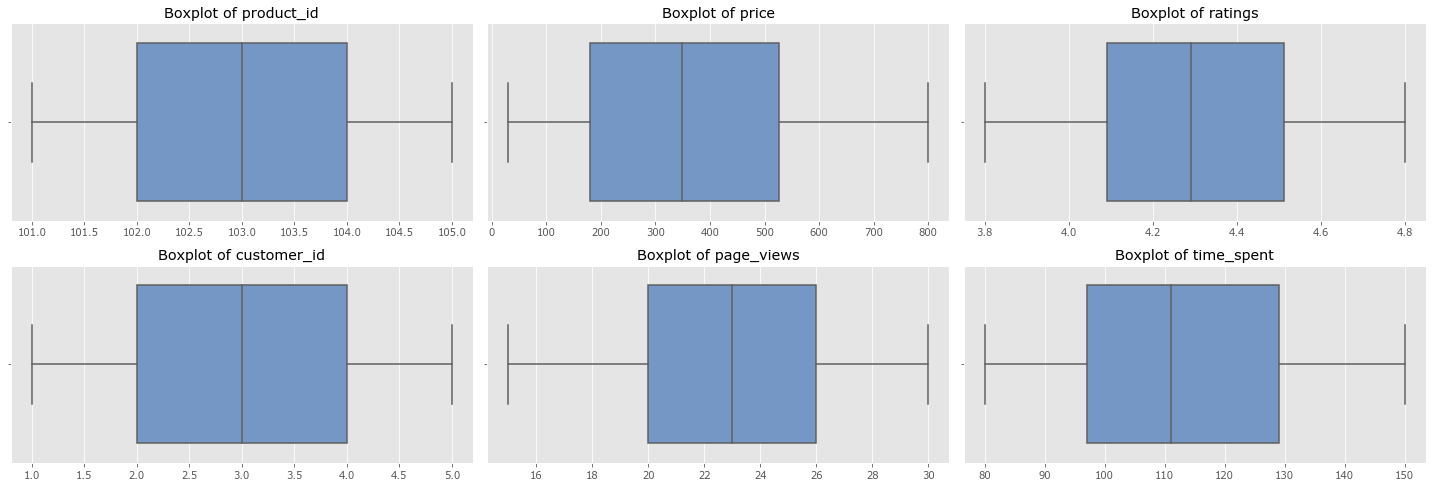

In [117]:
# Overview Outlier on Dataset
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64'])
numeric_columns = numeric_columns.drop("total_purchase", axis=1)
plt.figure(figsize=(20, 10))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=merged_data[column], color="#6895D2")
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

>Pada dataset tidak memiliki outlier sehingga tidak diperlukan tahap outlier handling

### 3. Model Development

- Build a predictive model that can forecast the next product a customer is likely to purchase.
- Choose an appropriate machine learning algorithm and explain the reasons behind your selection.
- Train the model on historical data and evaluate its performance using relevant metrics.

In [188]:
# Load libraries
import joblib
from typing import List
from sklearn.neighbors import NearestNeighbors

In [118]:
# Overview dataset
merged_data.head()

,product_id,category,price,ratings,customer_id,purchase_date,page_views,time_spent,ratings_normalize,total_purchase
0,104,Beauty,30,3.99496,4,2023-01-05,23,118,3,1
1,104,Beauty,30,3.99496,4,2023-01-05,18,93,3,1
2,104,Beauty,30,3.99496,4,2023-01-05,24,119,3,1
3,104,Beauty,30,3.99496,4,2023-01-05,21,107,3,1
4,104,Beauty,30,3.99496,4,2023-01-05,15,80,3,1


In [175]:
# Feature select
features = ["category", "price", "ratings", "page_views", "time_spent"]
X = merged_data[features]

## Transform string to numeric on 'category' column.
map_category = {
    'Electronics': 1, 'Clothing': 2, 
    'Home & Kitchen': 3, 'Beauty': 4
}
X['category'] = X['category'].replace(map_category)

## Preview features
X.head()

,category,price,ratings,page_views,time_spent
0,4,30,3.99496,23,118
1,4,30,3.99496,18,93
2,4,30,3.99496,24,119
3,4,30,3.99496,21,107
4,4,30,3.99496,15,80


In [177]:
# Define and Training Model
knn_model = NearestNeighbors(n_neighbors=5, metric="euclidean")
knn_model.fit(X)

NearestNeighbors(metric='euclidean')

In [200]:
# Predict according not equal customer_id.
def recommend_top_n_product(customer_id: int, n: int=5) -> List[int]:
    top_n_prods = []
    cust_features = merged_data[merged_data['customer_id']!=customer_id][features]
    cust_features['category'] = cust_features['category'].replace(map_category)
    cust_features = cust_features.drop_duplicates().reset_index(drop=True)
    dist, indices = knn_model.kneighbors(cust_features.values)
    for i in indices.flatten():
        if merged_data.iloc[i]['product_id'] not in top_n_prods:
            top_n_prods.append(merged_data.iloc[i]['product_id'])
        if len(top_n_prods) >= n:
            break
    return top_n_prods

# Evaluate model metrics
def evaluate_metrics():
    pre, re, f1 = [], [], []
    for cust_id in range(1, 6):
        ground_truth = merged_data[merged_data['customer_id']==cust_id]['product_id'].unique().tolist()
        recommendation = recommend_top_n_product(cust_id)
        intersection = set(recommendation).intersection(ground_truth)
        prec = len(intersection) / 5
        pre.append(prec)
        rec = len(intersection) / len(ground_truth)
        re.append(rec)
        f1c = (2 * prec * rec) / (prec + rec)
        f1.append(f1c)
    avg_precision = sum(pre) / len(pre)
    avg_recall = sum(re) / len(re)
    avg_f1_score = sum(f1) / len(f1)
    return avg_precision, avg_recall, avg_f1_score

In [198]:
# Test model trained
cust_id = 1
top_n_prods = recommend_top_n_product(cust_id)
print(top_n_prods)

[104, 103, 105, 102, 101]


In [199]:
merged_data['customer_id'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [201]:
# Evaluate model trained
evaluate_metrics()

(1.0, 1.0, 1.0)

In [189]:
# Save trained model
joblib.dump(knn_model, 'model.pkl')

['model.pkl']

In [202]:
# Save merge dataset
merged_data.to_csv("agg_table.csv", index=False)